In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df_train = pd.read_parquet('../../data/통합_train_데이터.parquet')

           Count  Ratio (%)
Segment                    
A            972       0.04
B            144       0.01
C         127590       5.32
D         349242      14.55
E        1922052      80.09


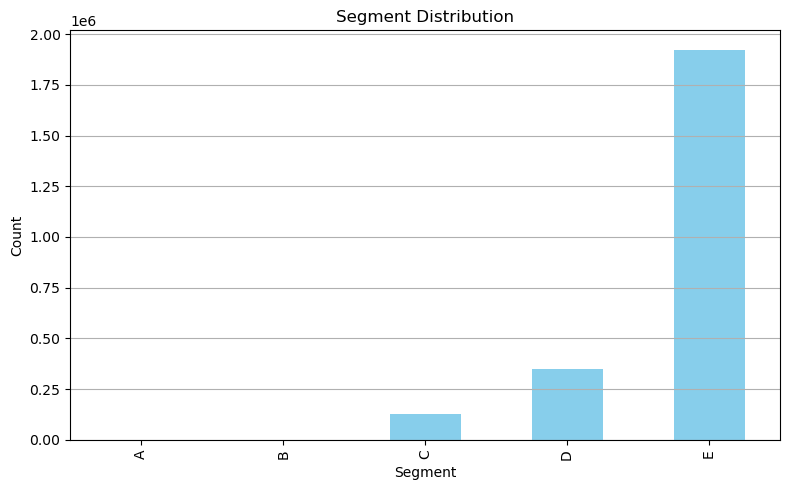

In [ ]:
# 세그먼트 비율 확인
segment_counts = df_train['Segment'].value_counts()
segment_ratio = df_train['Segment'].value_counts(normalize=True) * 100
segment_df = pd.DataFrame({
    'Count': segment_counts,
    'Ratio (%)': segment_ratio.round(2)
}).sort_index()

print(segment_df)

# 시각화 (막대그래프)
plt.figure(figsize=(8, 5))
segment_counts.sort_index().plot(kind='bar', color='skyblue')
plt.title("Segment Distribution")
plt.xlabel("Segment")
plt.ylabel("Count")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
# 사전 선정한 주요 피처 목록
features_tx = [
    '이용건수_신용_B0M', '이용건수_신판_B0M', '이용건수_일시불_B0M',
    '이용금액_일시불_B0M', '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외', '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M', '할부건수_무이자_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적', '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M', '이용건수_오프라인_R6M',
    '이용건수_페이_온라인_R6M', '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M', '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'
]

# 피처만 선택
df_tx_selected = df_train[features_tx]

In [5]:
# 결측치 개수 및 비율 계산
missing = df_tx_selected.isnull().sum().to_frame(name='Missing Count')
missing['Missing Ratio (%)'] = (missing['Missing Count'] / len(df_tx_selected) * 100).round(2)

# 결측치가 존재하는 컬럼만 출력
print("✅ 결측치 현황:")
print(missing[missing['Missing Count'] > 0])

✅ 결측치 현황:
Empty DataFrame
Columns: [Missing Count, Missing Ratio (%)]
Index: []


In [6]:
# 수치형 피처만 describe()
print("✅ 주요 수치형 피처 통계 요약:")
print(df_tx_selected.describe().T)

✅ 주요 수치형 피처 통계 요약:
                        count          mean           std     min    25%  \
이용건수_신용_B0M         2400000.0     14.612542     19.936069    -3.0    0.0   
이용건수_신판_B0M         2400000.0     14.530447     19.923676    -3.0    0.0   
이용건수_일시불_B0M        2400000.0     14.383559     19.825122    -3.0    0.0   
이용금액_일시불_B0M        2400000.0   3583.204306   4592.850539 -2663.0    0.0   
이용후경과월_신용           2400000.0      2.496675      4.129110     0.0    0.0   
이용후경과월_일시불          2400000.0      1.930475      4.012755     0.0    0.0   
이용후경과월_체크           2400000.0     10.114228      4.184361     0.0   12.0   
이용금액_해외             2400000.0    158.968186    494.922177     0.0    0.0   
쇼핑_도소매_이용금액         2400000.0    521.425870    737.891786     0.0    0.0   
쇼핑_마트_이용금액          2400000.0    360.518902    582.036631     0.0    0.0   
쇼핑_온라인_이용금액         2400000.0   1623.556714   4339.078725     0.0    0.0   
교통_주유이용금액           2400000.0    627.182323   1078.745798     0.0    

In [9]:
# 수치형 변수 간의 피어슨 상관계수 계산
corr_matrix = df_tx_selected.select_dtypes(include='number').corr()

# 상위 일부만 보고 싶으면 예: corr_matrix.iloc[:10, :10]
print("✅ 상관계수 행렬:")
print(corr_matrix.iloc[:20, :20])

✅ 상관계수 행렬:
                  이용건수_신용_B0M  이용건수_신판_B0M  이용건수_일시불_B0M  이용금액_일시불_B0M  \
이용건수_신용_B0M          1.000000     0.999802      0.999497      0.818535   
이용건수_신판_B0M          0.999802     1.000000      0.999765      0.818988   
이용건수_일시불_B0M         0.999497     0.999765      1.000000      0.819025   
이용금액_일시불_B0M         0.818535     0.818988      0.819025      1.000000   
이용후경과월_신용           -0.382990    -0.380742     -0.378419     -0.408103   
이용후경과월_일시불          -0.379351    -0.378328     -0.377064     -0.357889   
이용후경과월_체크           -0.099899    -0.099926     -0.098963     -0.043478   
이용금액_해외              0.319888     0.320239      0.320367      0.433080   
쇼핑_도소매_이용금액          0.601619     0.600222      0.593754      0.709390   
쇼핑_마트_이용금액           0.607319     0.607325      0.604448      0.702670   
쇼핑_온라인_이용금액          0.472465     0.472834      0.468523      0.558913   
교통_주유이용금액            0.492709     0.492333      0.491450      0.653702   
교통_정비이용금액            0.4493

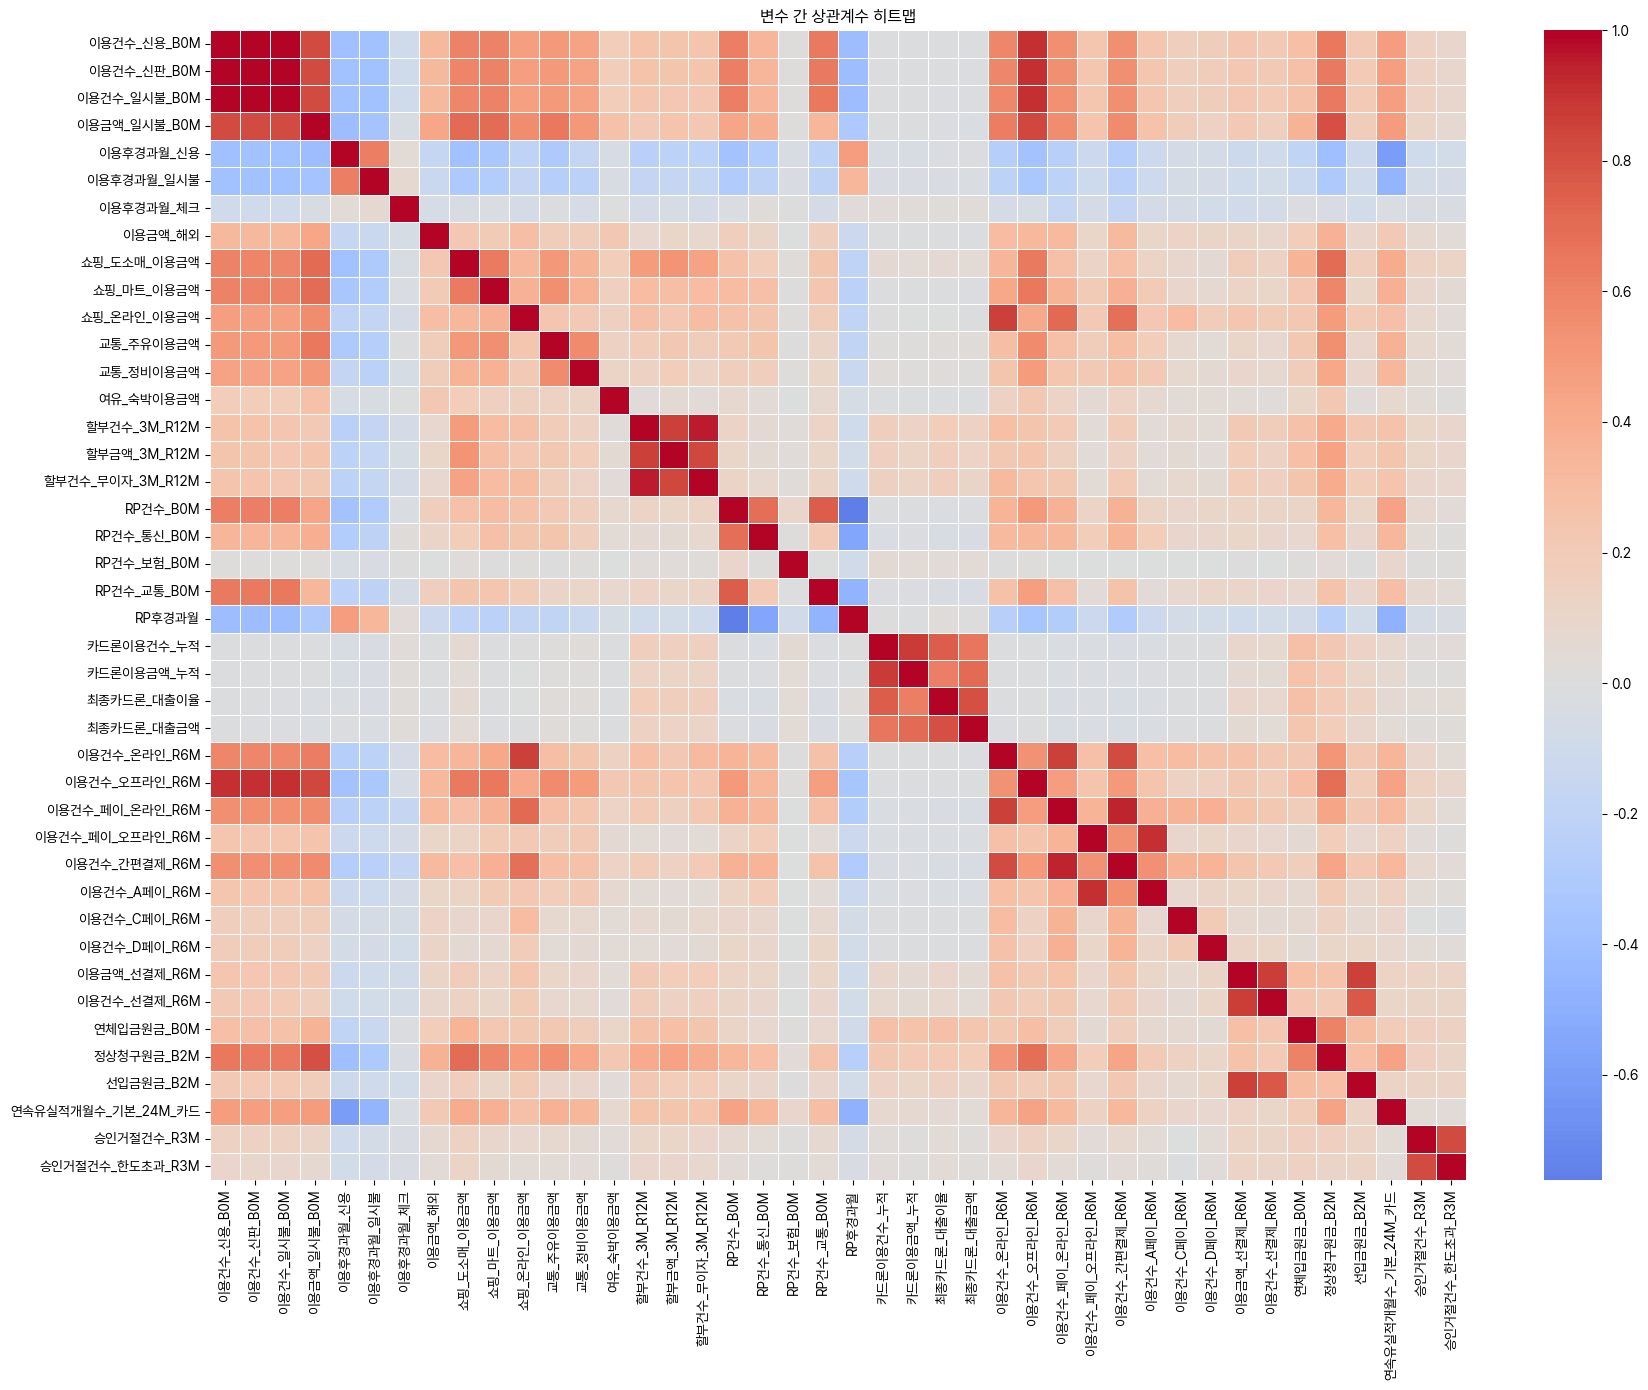

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("변수 간 상관계수 히트맵")
plt.tight_layout()
plt.show()

### 다중공선성 (VIF) 처리

In [11]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 1. 수치형 피처만 선택 (범주형 '이용금액대'는 제외)
X = df_tx_selected.select_dtypes(include='number').copy()

# 2. 결측치 처리 (임시로 평균값으로 대체)
X.fillna(X.mean(), inplace=True)

# 3. 스케일링 (VIF는 단위 민감 → 표준화 필요)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 4. VIF 계산
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 5. 정렬된 결과 출력
vif_df.sort_values(by='VIF', ascending=False, inplace=True)
print(vif_df)

               Feature           VIF
1          이용건수_신판_B0M  12303.007371
2         이용건수_일시불_B0M   7377.658291
0          이용건수_신용_B0M   4905.220439
30       이용건수_간편결제_R6M     17.256456
14        할부건수_3M_R12M     17.177809
28     이용건수_페이_온라인_R6M     15.320425
17            RP건수_B0M     13.185136
3         이용금액_일시불_B0M     13.067419
16    할부건수_무이자_3M_R12M     12.712804
26        이용건수_온라인_R6M      8.789537
22          카드론이용건수_누적      8.017674
27       이용건수_오프라인_R6M      7.779522
37          정상청구원금_B2M      7.187630
20         RP건수_교통_B0M      6.802829
23          카드론이용금액_누적      6.731747
29    이용건수_페이_오프라인_R6M      6.609400
34        이용금액_선결제_R6M      6.566360
31        이용건수_A페이_R6M      6.016210
24          최종카드론_대출이율      5.677406
25          최종카드론_대출금액      4.630113
15        할부금액_3M_R12M      4.599615
10         쇼핑_온라인_이용금액      4.368892
18         RP건수_통신_B0M      4.184723
35        이용건수_선결제_R6M      4.184373
38           선입금원금_B2M      4.149057
8          쇼핑_도소매_이용금액      3.429579
4

In [14]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# 💡 수치형 변수만 선택 (범주형 제외)
X = df_tx_selected.select_dtypes(include='number').copy()

# 💡 다중공선성 높은 피처 제거
drop_cols = [
    '이용건수_신판_B0M',
    '이용건수_일시불_B0M',
    '할부건수_무이자_3M_R12M',
    '이용건수_페이_온라인_R6M',
    '이용건수_간편결제_R6M'
]
X = X.drop(columns=drop_cols)

# 💡 결측치 처리 (평균 대체)
X.fillna(X.mean(), inplace=True)

# 💡 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 💡 VIF 재계산
vif_df = pd.DataFrame()
vif_df["Feature"] = X.columns
vif_df["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

# 💡 정렬하여 출력
vif_df.sort_values(by="VIF", ascending=False, inplace=True)
print(vif_df)

               Feature        VIF
14            RP건수_B0M  13.171364
0          이용건수_신용_B0M  11.813178
1         이용금액_일시불_B0M  11.490806
19          카드론이용건수_누적   8.011603
24       이용건수_오프라인_R6M   7.640291
17         RP건수_교통_B0M   6.773107
20          카드론이용금액_누적   6.706137
29        이용금액_선결제_R6M   6.545232
26        이용건수_A페이_R6M   5.914864
25    이용건수_페이_오프라인_R6M   5.844418
32          정상청구원금_B2M   5.810643
21          최종카드론_대출이율   5.609010
23        이용건수_온라인_R6M   5.395028
12        할부건수_3M_R12M   4.621697
22          최종카드론_대출금액   4.560869
13        할부금액_3M_R12M   4.448076
8          쇼핑_온라인_이용금액   4.298464
30        이용건수_선결제_R6M   4.176090
15         RP건수_통신_B0M   4.155363
33           선입금원금_B2M   4.124879
6          쇼핑_도소매_이용금액   3.308204
35          승인거절건수_R3M   3.154855
36     승인거절건수_한도초과_R3M   3.129806
18              RP후경과월   3.085095
7           쇼핑_마트_이용금액   2.337248
2            이용후경과월_신용   2.311607
9            교통_주유이용금액   2.268717
34  연속유실적개월수_기본_24M_카드   2.016608
31          연체

### 상관계수 다시 보기

In [15]:
# 수치형 피처 간 상관계수 계산
corr_matrix = df_tx_selected.select_dtypes(include='number').corr()

# 상관계수 0.9 이상 추출 함수
def get_high_corr_pairs(corr_matrix, threshold=0.9):
    corr_pairs = corr_matrix.abs().unstack()
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    high_corr = high_corr.drop_duplicates().sort_values(ascending=False)
    return high_corr

# 실행
high_corr = get_high_corr_pairs(corr_matrix, threshold=0.9)
print("✅ 상관계수 0.9 이상 변수쌍:")
print(high_corr)

✅ 상관계수 0.9 이상 변수쌍:
이용건수_신용_B0M       이용건수_신판_B0M         0.999802
이용건수_신판_B0M       이용건수_일시불_B0M        0.999765
이용건수_신용_B0M       이용건수_일시불_B0M        0.999497
할부건수_3M_R12M      할부건수_무이자_3M_R12M    0.956185
이용건수_페이_온라인_R6M   이용건수_간편결제_R6M       0.943512
이용건수_페이_오프라인_R6M  이용건수_A페이_R6M        0.909750
이용건수_신판_B0M       이용건수_오프라인_R6M       0.903837
이용건수_일시불_B0M      이용건수_오프라인_R6M       0.903775
이용건수_신용_B0M       이용건수_오프라인_R6M       0.903698
dtype: float64


In [16]:
drop_corr_cols = [
    '이용건수_신판_B0M',
    '이용건수_일시불_B0M',
    '이용건수_오프라인_R6M',
    '할부건수_무이자_3M_R12M',
    '이용건수_페이_오프라인_R6M',
    '이용건수_간편결제_R6M'
]

df_tx_final = df_tx_selected.drop(columns=drop_corr_cols)

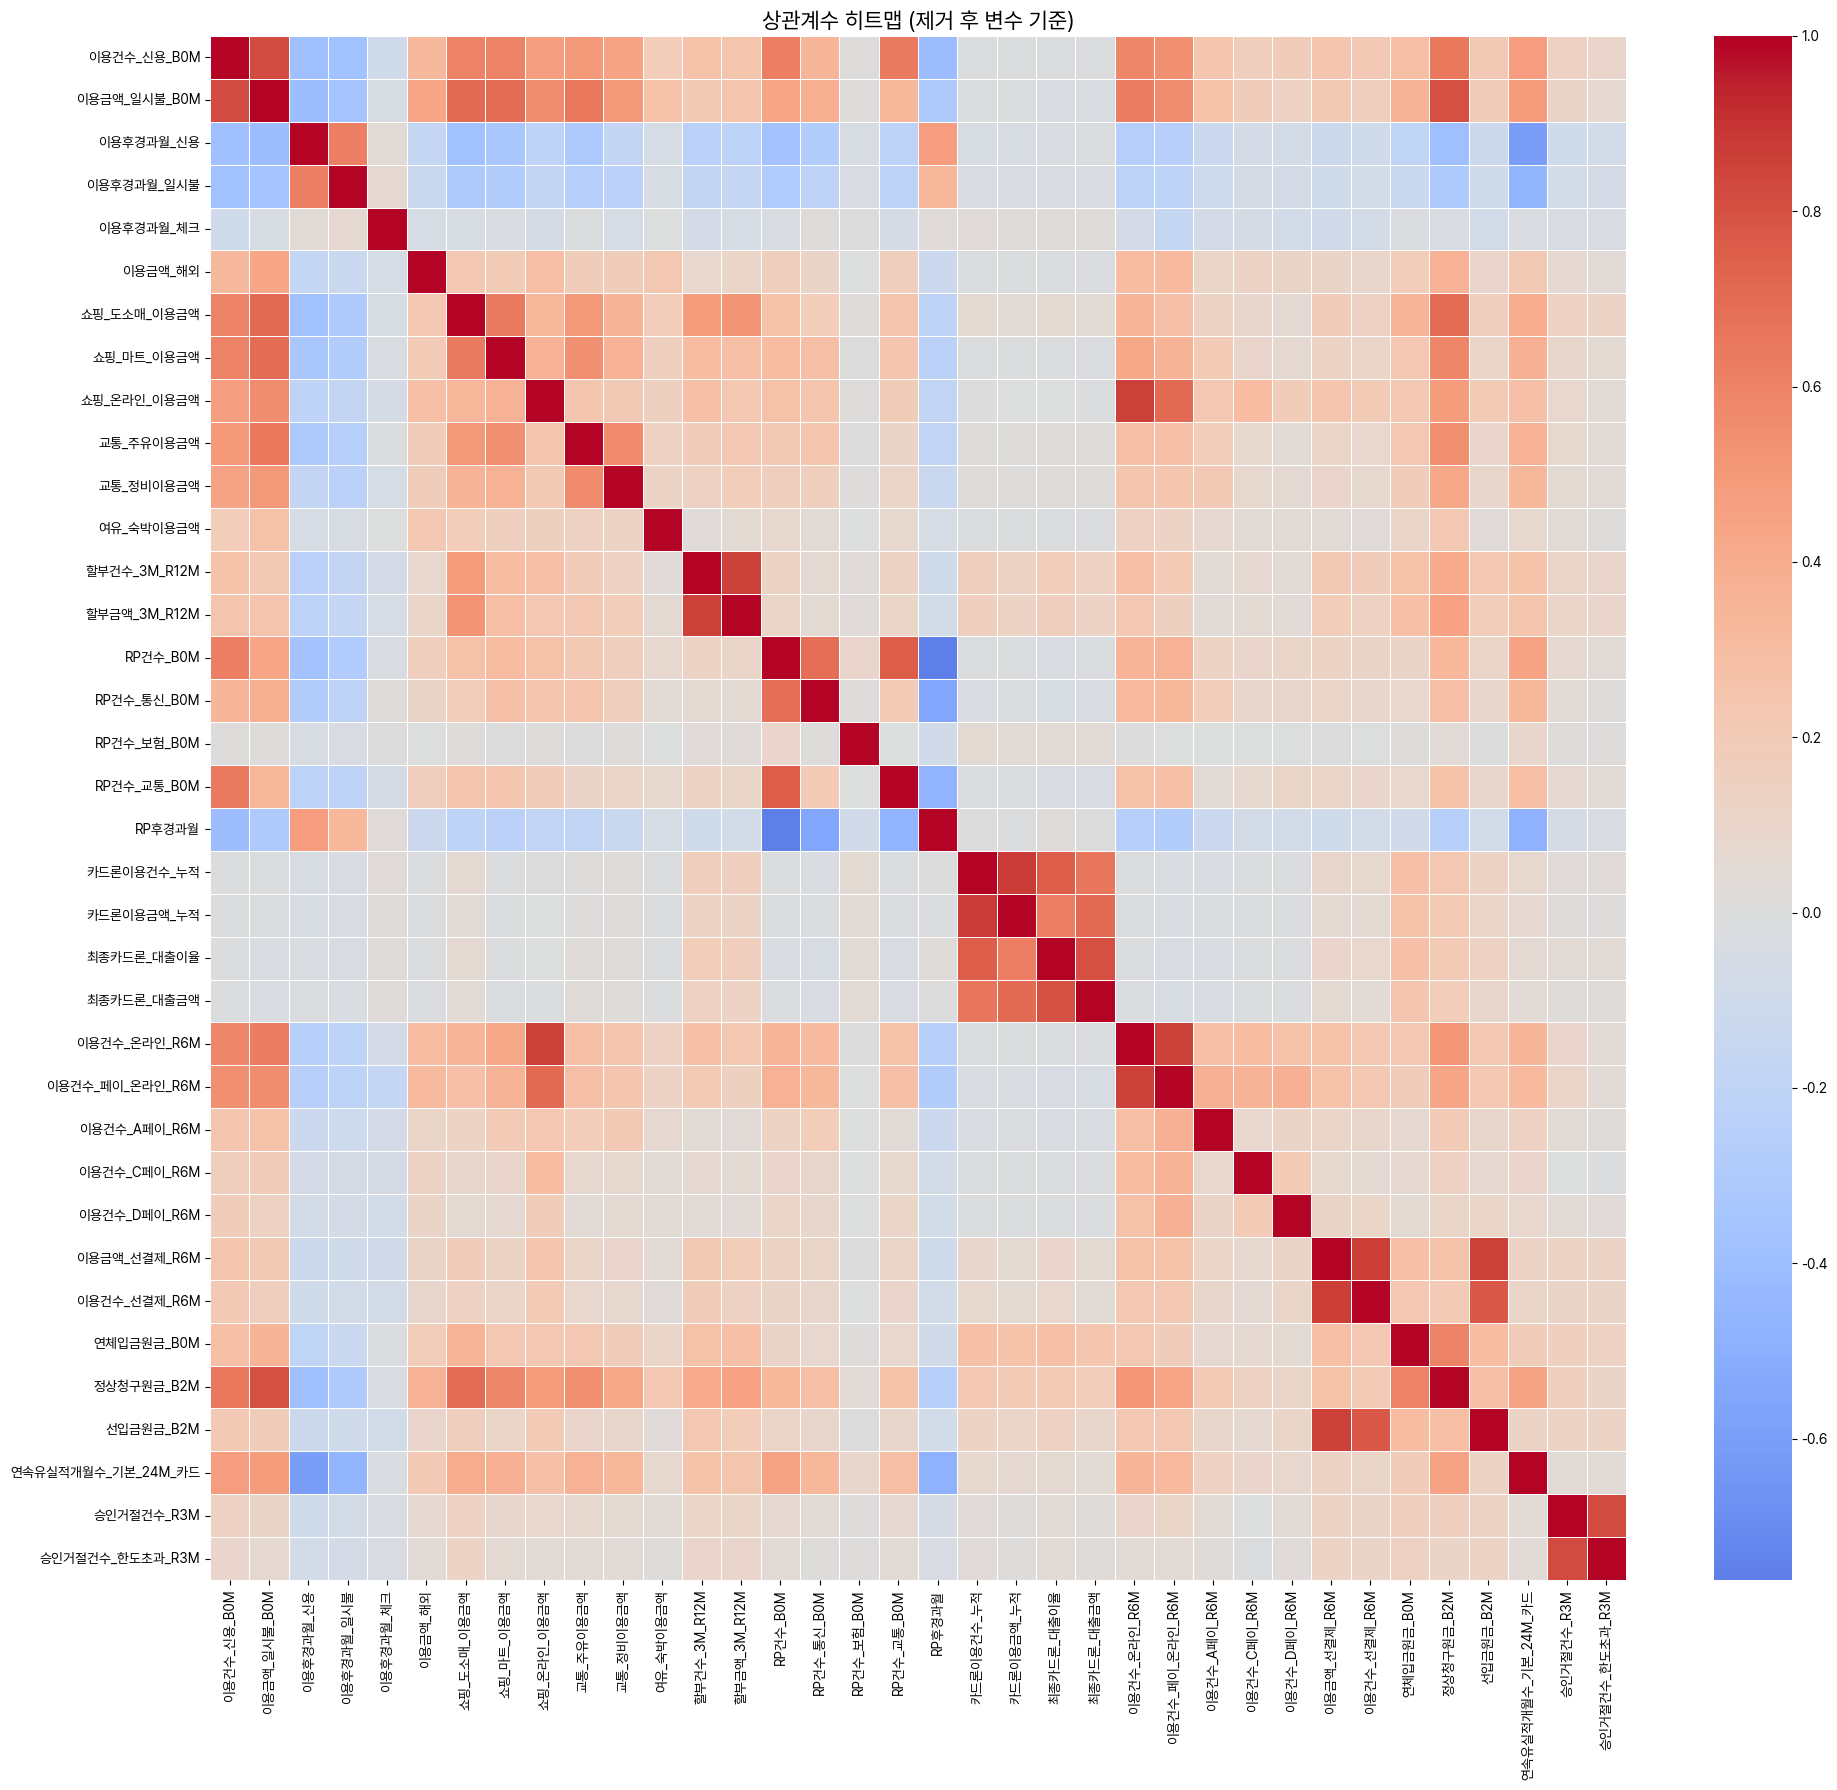

In [22]:
# 남겨둘 변수만 필터링
filtered_features = [col for col in features_tx if col not in drop_corr_cols]
df_tx_final = df_tx_selected[filtered_features]

# 수치형 변수 상관계수 계산
corr_matrix = df_tx_final.select_dtypes(include='number').corr()

# 시각화
plt.figure(figsize=(20, 18))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("상관계수 히트맵 (제거 후 변수 기준)", fontsize=16)
plt.tight_layout()
plt.show()

In [24]:
import pandas as pd

# 상관계수 행렬 계산 (수치형 변수만)
corr_matrix = df_tx_final.select_dtypes(include='number').corr()

# 상관계수 0.9 이상인 쌍 추출 함수
def get_high_corr_pairs(corr_matrix, threshold=0.9):
    corr_pairs = corr_matrix.abs().unstack()
    high_corr = corr_pairs[(corr_pairs > threshold) & (corr_pairs < 1)]
    high_corr = high_corr.drop_duplicates().sort_values(ascending=False)
    return high_corr

# 실행
high_corr_pairs = get_high_corr_pairs(corr_matrix, threshold=0.9)

# 결과 확인
print("✅ 제거 후 상관계수 0.9 이상 변수쌍:")
print(high_corr_pairs)

✅ 제거 후 상관계수 0.9 이상 변수쌍:
Series([], dtype: float64)


In [3]:
import pandas as pd
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 1. ✅ 피처 목록 (정제된 승인매출 피처들, 중복 제거 반영)
filtered_features = [
    '이용건수_신용_B0M',
    '이용금액_일시불_B0M',
    '이용후경과월_신용', '이용후경과월_일시불', '이용후경과월_체크',
    '이용금액_해외',
    '쇼핑_도소매_이용금액', '쇼핑_마트_이용금액', '쇼핑_온라인_이용금액',
    '교통_주유이용금액', '교통_정비이용금액', '여유_숙박이용금액',
    '할부건수_3M_R12M', '할부금액_3M_R12M',
    'RP건수_B0M', 'RP건수_통신_B0M', 'RP건수_보험_B0M', 'RP건수_교통_B0M', 'RP후경과월',
    '카드론이용건수_누적', '카드론이용금액_누적',
    '최종카드론_대출이율', '최종카드론_대출금액',
    '이용건수_온라인_R6M',
    '이용건수_A페이_R6M', '이용건수_C페이_R6M', '이용건수_D페이_R6M',
    '이용금액_선결제_R6M', '이용건수_선결제_R6M',
    '연체입금원금_B0M', '정상청구원금_B2M', '선입금원금_B2M',
    '연속유실적개월수_기본_24M_카드',
    '승인거절건수_R3M', '승인거절건수_한도초과_R3M',
    '이용금액대'  # 범주형
]

# 2. ✅ 입력 X, 타겟 y 정의
X = df_train[filtered_features].copy()
y_raw = df_train['Segment']

# 3. ✅ 범주형 처리 (이용금액대)
le_amt = LabelEncoder()
X['이용금액대'] = le_amt.fit_transform(X['이용금액대'].astype(str))

# 4. ✅ 타겟 segment 인코딩
le_seg = LabelEncoder()
y = le_seg.fit_transform(y_raw)  # y는 0~4로 인코딩됨

# 5. ✅ 학습/검증 데이터 분리
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# 6. ✅ XGBoost 모델 정의 및 학습 (GPU)
model = XGBClassifier(
    objective='multi:softmax',
    num_class=5,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42,
    tree_method='gpu_hist',         # ✅ GPU 학습
    predictor='gpu_predictor'
)
model.fit(X_train, y_train)

# 7. ✅ 예측 및 평가
y_pred = model.predict(X_valid)
y_pred_label = le_seg.inverse_transform(y_pred)
y_valid_label = le_seg.inverse_transform(y_valid)

print("✅ 분류 성능 리포트:")
print(classification_report(y_valid_label, y_pred_label))

c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [15:45:48] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\somee\anaconda3\Lib\site-packages\xgboost\core.py:2676: UserWarning: [15:45:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  if len(data.s

✅ 분류 성능 리포트:
              precision    recall  f1-score   support

           A       0.74      0.27      0.39       194
           B       0.93      0.45      0.60        29
           C       0.70      0.50      0.58     25518
           D       0.63      0.49      0.55     69848
           E       0.91      0.97      0.94    384411

    accuracy                           0.87    480000
   macro avg       0.78      0.53      0.61    480000
weighted avg       0.86      0.87      0.86    480000



In [5]:
import joblib
from sklearn.preprocessing import LabelEncoder

# 라벨 인코더 생성
le = LabelEncoder()
# 모델 저장
joblib.dump(model, 'models/try__model.pkl')

# LabelEncoder도 함께 저장 (Segment 변환용)
joblib.dump(le, 'models/try_3_label_encoder.pkl')

['models/try_3_label_encoder.pkl']